In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries imported successfully!")

All libraries imported successfully!


In [40]:
#DataSet Loading
DataSet = pd.read_csv("netflix_titles.csv")
DataSet.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [41]:
DataSet = DataSet.copy()
DataSet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [42]:
DataSet.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [43]:
DataSet.shape

(8807, 12)

In [44]:
#Missing Value Handling
DataSet.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [45]:
#Fill or drop missing values
DataSet['country'] = DataSet['country'].fillna('Unknown')
DataSet['rating'] = DataSet['rating'].fillna('Not Rated')
DataSet['date_added'] = DataSet['date_added'].fillna(method='ffill')
print("Success")


Success


C:\Users\BEST BUY COMPUTERS\AppData\Local\Temp\ipykernel_10220\1899667531.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  DataSet['date_added'] = DataSet['date_added'].fillna(method='ffill')


In [46]:
#Handle date_added column
DataSet['date_added'] = pd.to_datetime(DataSet['date_added'], errors='coerce')
DataSet['date_added'] = DataSet['date_added'].fillna(method='ffill')

#Handle year_added column
DataSet['year_added'] = DataSet['date_added'].dt.year
DataSet[['date_added', 'year_added']].head()

C:\Users\BEST BUY COMPUTERS\AppData\Local\Temp\ipykernel_10220\3195334355.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  DataSet['date_added'] = DataSet['date_added'].fillna(method='ffill')


,date_added,year_added
0,2021-09-25,2021
1,2021-09-24,2021
2,2021-09-24,2021
3,2021-09-24,2021
4,2021-09-24,2021


In [47]:
#Processing multi-valued columns
DataSet['country'] = DataSet['country'].str.split(', ')
DataSet = DataSet.explode('country')

DataSet['listed_in'] = DataSet['listed_in'].str.split(', ')
DataSet = DataSet.explode('listed_in')


Q1. What is the distribution of Movies versus TV Shows on Netflix?

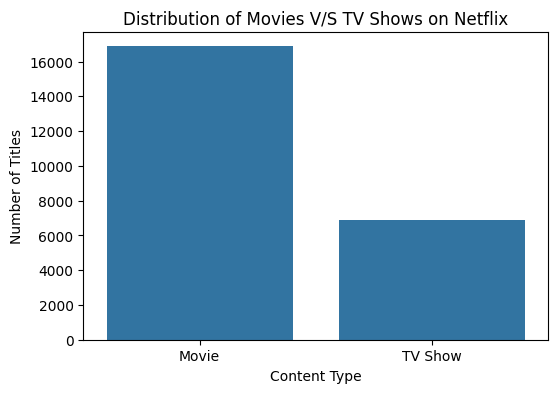

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(data=DataSet, x='type')
plt.title("Distribution of Movies V/S TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.show()

Q2. Which are the top 10 countries producing the most Netflix content?

In [49]:
DataSet['country'].value_counts().head(10)



country
United States     6779
India             2804
United Kingdom    1779
Unknown           1722
France             916
Canada             877
Japan              733
South Korea        632
Spain              591
Germany            511
Name: count, dtype: int64

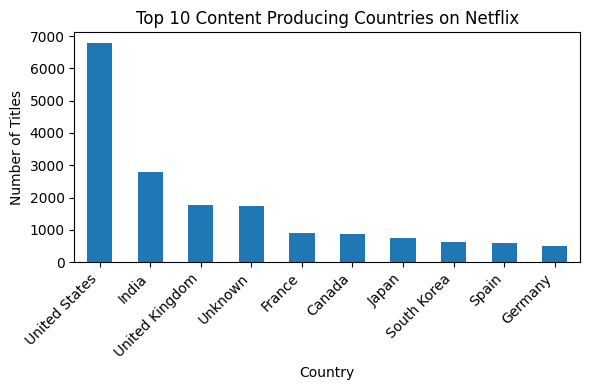

In [50]:
plt.figure(figsize=(6,4))
DataSet['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Q3. How has the number of titles added to Netflix changed over the years?

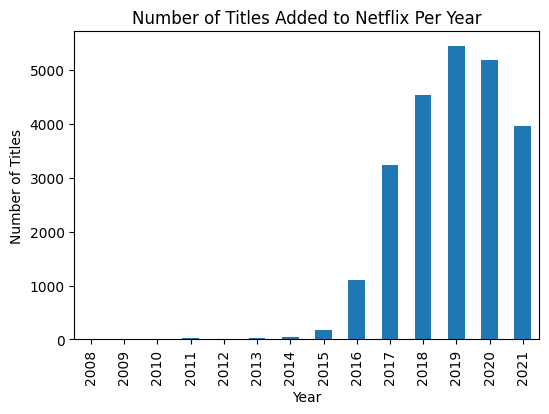

In [51]:
plt.figure(figsize=(6,4))
DataSet.groupby('year_added').size().plot(kind='bar')
plt.title("Number of Titles Added to Netflix Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

Q4. What are the most common content ratings on Netflix?

In [52]:
DataSet['rating'].value_counts().head(10)


rating
TV-MA    8651
TV-14    5804
R        2499
TV-PG    2208
PG-13    1584
PG        904
TV-Y7     675
TV-Y      522
TV-G      500
NR        238
Name: count, dtype: int64

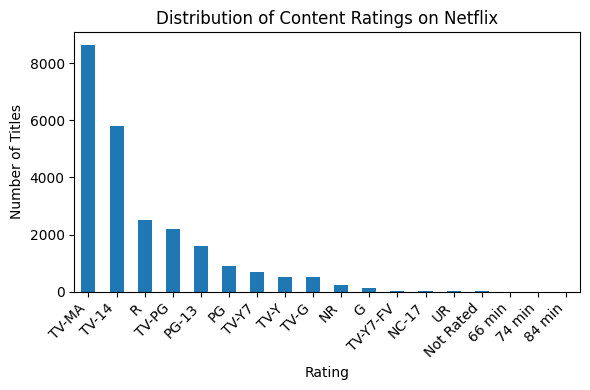

In [53]:
rating_counts = DataSet['rating'].value_counts()
plt.figure(figsize=(6,4))
rating_counts.plot(kind='bar')
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Q5. What are the most frequently occurring genres in the Netflix catalog?

In [54]:
DataSet['listed_in'].value_counts().head(10)


listed_in
International Movies        3509
Dramas                      3199
Comedies                    1981
International TV Shows      1465
Action & Adventure          1182
Documentaries               1116
Independent Movies          1040
TV Dramas                    852
Children & Family Movies     845
Thrillers                    806
Name: count, dtype: int64

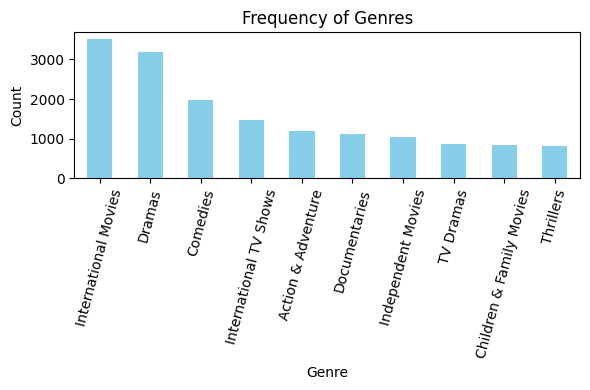

In [55]:
genre_counts = DataSet['listed_in'].value_counts().head(10)
plt.figure(figsize=(6,4))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

Q6. Create a new feature:
Content Age = Year Added – Release Year


In [56]:
DataSet['content_age'] = DataSet['year_added'] - DataSet['release_year']
DataSet.groupby('type')['content_age'].mean()


type
Movie      6.130386
TV Show    2.196919
Name: content_age, dtype: float64

Q7. Has Netflix expanded into new genres over time, or is it repeatedly investing in the same genres?

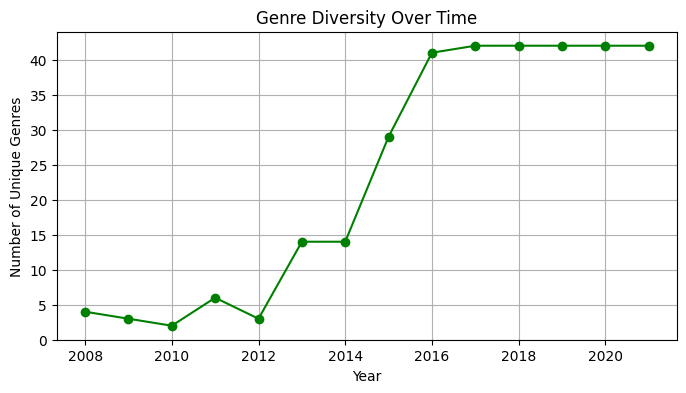

In [57]:
genre_diversity = DataSet.groupby('year_added')['listed_in'].nunique()

plt.figure(figsize=(8,4))
genre_diversity.plot(kind='line', marker='o', color='green')
plt.title('Genre Diversity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Unique Genres')
plt.grid(True)
plt.show()


Q8. Is Netflix overly dependent on a small number of countries for its content supply?

In [58]:
country_share = DataSet['country'].value_counts(normalize=True) * 100
country_share.head(10)


country
United States     28.538351
India             11.804328
United Kingdom     7.489265
Unknown            7.249305
France             3.856193
Canada             3.692010
Japan              3.085796
South Korea        2.660605
Spain              2.488002
Germany            2.151217
Name: proportion, dtype: float64

Q9. Has there been a noticeable shift toward more mature content ratings over the years?

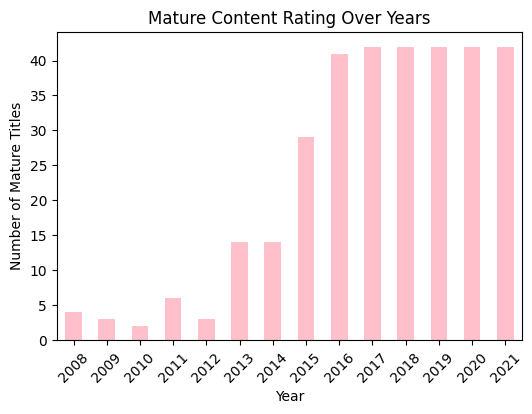

In [59]:
mature_counts = df.groupby('year_added')['listed_in'].nunique()

plt.figure(figsize=(6,4))
mature_counts.plot(kind='bar', color='pink')
plt.title('Mature Content Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Mature Titles')
plt.xticks(rotation=45)
plt.show()


In [60]:
# Save the cleaned dataset
df.to_csv("netflix_cleaned.csv", index=False)


Q10. Based on your EDA findings, identify one potential strategic risk in Netflix’s content strategy and justify it using data-driven evidence.

## Insights & Conclusions

This exploratory data analysis examined Netflix’s content portfolio across time, geography, genres, and ratings to understand strategic patterns.

### Key Findings

1. **Content Composition**
   Netflix’s catalog is dominated by Movies, with TV Shows forming a smaller but steadily growing segment. This suggests Netflix prioritizes film acquisitions while gradually expanding serialized content.

2. **Geographic Concentration**
   Content production is highly concentrated in a small number of countries. The United States alone contributes a large proportion of total titles, followed by India and the United Kingdom. The top five countries account for a majority of Netflix’s content supply.

3. **Growth Over Time**
   The number of titles added to Netflix increased rapidly after 2015, reflecting Netflix’s global expansion and aggressive content acquisition strategy.

4. **Genre Patterns**
   Drama, Comedy, and International Movies are the most frequent genres. While Netflix has expanded into new genres over time, much of the investment continues to focus on a core set of popular categories.

5. **Content Age**
   Netflix tends to add relatively recent content, especially for Movies, while TV Shows often include slightly older releases. This indicates a preference for keeping the catalog fresh while maintaining long-running series.

6. **Ratings Trend**
   There has been a noticeable increase in mature-rated content (TV-MA and R) over time, particularly in Movies. This suggests Netflix is increasingly targeting adult audiences.


### Strategic Risk

Netflix appears to be **over-dependent on a small group of countries for content supply**. This geographic concentration poses a strategic risk: regulatory changes, licensing restrictions, or geopolitical issues in these regions could disrupt Netflix’s content pipeline.

Additionally, the increasing focus on mature content may limit Netflix’s appeal to family and younger audiences, potentially narrowing its long-term user base.
